Download links:
- French NFI : https://inventaire-forestier.ign.fr/dataifn/ 

# Method :

1. Clean TABLES by looking only at visible trees from satellite imagery. 
2. Aggregate tree level variables at the plot level. For one variable, the most common value among the trees of the plots is kept (if this value is shared by more than 25% of the trees). 
3. Plots are classified according to the variables values. The classification is done by a weighted score system that takes into account two types of variables : High and low probabilities of being a sign of specific forest disturbance. 

In [1]:
#loading data
import pandas as pd

col_placette = ['IDP', 'VISITE','DC', 'XL', 'YL','DPYR', 'ANPYR', 'NINCID', 'INCID', 'GEST', 'ELAG', 'PRELEV5', 'DEF5']
col_arbre = ['IDP', 'A', 'LIB', 'AGE', 'CAMPAGNE', 'ACCI', 'DATEMORT', 'VEGET', 'VEGET5', 'SFCOEUR', 'SFDORGE', 'SFGUI', 'MORTB', 'HTOT', 'W']
col_eco = ['IDP', 'OBSVEGET', 'HUMUS', 'DATEECO']
df_placette = pd.read_csv('../data/French_NFI/PLACETTE.csv', sep=';')[col_placette]
df_arbre = pd.read_csv('../data/French_NFI/ARBRE.csv', sep=';')[col_arbre]
df_eco = pd.read_csv('../data/French_NFI/ECOLOGIE.csv', sep=';')[col_eco]


/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_8111/972732961.py:7: DtypeWarning: Columns (15,16,18,24,25,26,27,28,32,36,39,40,41,42,44,49,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df_placette = pd.read_csv('../data/French_NFI/PLACETTE.csv', sep=';')[col_placette]
/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_8111/972732961.py:8: DtypeWarning: Columns (4,5,9,14,21,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_arbre = pd.read_csv('../data/French_NFI/ARBRE.csv', sep=';')[col_arbre]
/var/folders/1c/h8t9_vd53gsgz_wm9kswm8wm0000gp/T/ipykernel_8111/972732961.py:9: DtypeWarning: Columns (15,20,21,22,25,26,27,30,31,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_eco = pd.read_csv('../data/French_NFI/ECOLOGIE.csv', sep=';')[col_eco]


# Cleaning tables

- arbre : Height above 5m and canopy with full access to light. 
- placette : RAS  
- eco : RAS 

In [2]:
df_arbre_clean = df_arbre[ (df_arbre['LIB'] > 1) & ((df_arbre['HTOT'] > 5) | (df_arbre['HTOT'].isna())) ]

# Join 

The three tables are joined on 'IDP'. 
Then variables at the tree level are aggregated at the plot level. If a variable has the same value on more than 25% of the trees of one plot, then this value is reported to the plot level. Else, the variable is set to NaN. 

In [3]:
#merging all data
import functools as ft
dfs = [df_placette, df_arbre_clean, df_eco]
df = ft.reduce(lambda left, right: pd.merge(left, right, on='IDP'), dfs)
df

,IDP,VISITE,DC,XL,YL,DPYR,ANPYR,NINCID,INCID,GEST,...,VEGET5,SFCOEUR,SFDORGE,SFGUI,MORTB,HTOT,W,OBSVEGET,HUMUS,DATEECO
0,19,1,NaN,903872.281097,6.804836e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.0,14.144578,NaN,40,2005-06-29
1,19,1,NaN,903872.281097,6.804836e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.5,14.143712,NaN,40,2005-06-29
2,19,1,NaN,903872.281097,6.804836e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.5,39.290420,NaN,40,2005-06-29
3,19,1,NaN,903872.281097,6.804836e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,39.290787,NaN,40,2005-06-29
4,19,1,NaN,903872.281097,6.804836e+06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.5,39.288430,NaN,40,2005-06-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350983,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,NaN,0.0,NaN,0.0,0,20.3,39.281410,0.0,21,2021-05-11
1350984,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,0.0,0,NaN,39.290325,0.0,21,2021-05-11
1350985,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,88.405430,0.0,21,2021-05-11
1350986,1654936,1,0.0,493218.208358,6.693381e+06,NaN,NaN,0.0,NaN,1.0,...,NaN,NaN,NaN,0.0,0,NaN,39.283268,0.0,21,2021-05-11


In [4]:
import numpy as np
from collections import Counter

def most_common(a):
    n = len(a)
    lvalue = [(a, b/n) for a,b in Counter(a).most_common() if a==a]
    out = None
    
    if len(lvalue) > 0: #if more than 25% of the trees have a value 
        if lvalue[0][1] > 0.25:
            out = lvalue[0][0]
        else :
            out = np.nan
        # else:
        #     out = [v for (v,p) in lvalue if p>0.25]
        
    return out 

groups = df.groupby(['IDP', 'CAMPAGNE'])

dfgb = groups[['VEGET', 'VEGET5', 'ACCI', 'SFCOEUR', 'SFDORGE', 'SFGUI', 'MORTB', 'DATEMORT']].agg(most_common)
dfgb['HAVG'] = groups['HTOT'].mean() 
dfgb.reset_index(inplace=True)
col = ['DPYR', 'ANPYR', 'NINCID', 'INCID', 'GEST', 'ELAG', 'PRELEV5', 'DEF5', 'OBSVEGET', 'DC','HUMUS', 'DATEECO']
dfgb[col] = groups[col].first().reset_index()[col]
dfgb['XL'] = groups.XL.mean().reset_index()['XL']
dfgb['YL'] = groups.YL.mean().reset_index()['YL']

In [5]:
#dataframe to geodataframe
import geopandas as gpd
gdf = gpd.GeoDataFrame(dfgb, geometry=gpd.points_from_xy(dfgb.XL, dfgb.YL, crs='epsg:2154'), crs='epsg:2154')

# Classification 

- Fire :
- Storm : also landslide and hail 
- Biotic-dieback : mainly insect and fungi attack leaeding to dieback 
- Biotic-mortality : mainly insect and fungi attack leading to mortality
- Drought : 
- Tree-logging : selective logging or clear cut 

In [6]:
from datetime import datetime

classification = ['Fire', 'Storm', 'Biotic-dieback', 'Biotic-mortality', 'Drought', 'Tree-logging'] 

#value to str
classification_hp = {
    'Fire': {'NINCID':1},
    'Storm': {'NINCID':(3,4)},
    'Biotic-dieback': {},
    'Biotic-mortality': {'NINCID':2},
    'Drought': {'NINCID':2},
    'Tree-logging': {'DC':(1,2,3,4,5,6,7,8,9), 'PRELEV5':2}
}

classification_lp = {
    'Fire': {'VEGET':(5, 'C'), 'ACCI':4, 'OBSVEGET':1},
    'Storm': {'VEGET':('A', 'C', 'T', 2, 1), 'ACCI':(1,2,3), 'OBSVEGET':2},
    'Biotic-dieback': { 'NINCID':5, 'OBSVEGET':6, 'MORTB':(1,2,3,4), 'DPYR':(1,2), 'SFGUI':(1,2,3), 'SFCOEUR':1, 'SFDORGE':(1,2)},
    'Biotic-mortality': {'OBSVEGET':6, 'VEGET':(5, 'M'), 'VEGET5':(5, 'M')},
    'Drought': {'HUMUS':42, 'OBSVEGET':6, 'MORTB':(1,2,3,4)},
    'Tree-logging': {'OBSVEGET':(2,3), 'VEGET':(6,7), 'VEGET5':(6,7), 'GEST':2, 'ELAG':1, 'PRELEV5':1, 'DEF5':(1,2,3,4,5)}
}


classification_date = {
    'Fire': ['DATEMORT', 'CAMPAGNE', 'DATEECO'],
    'Storm': ['DATEMORT', 'CAMPAGNE', 'DATEECO'],
    'Biotic-dieback': ['ANPYR', 'CAMPAGNE'],
    'Biotic-mortality': ['DATEMORT', 'CAMPAGNE'],
    'Drought': ['CAMPAGNE', 'DATEECO'],
    'Tree-logging': ['CAMPAGNE']
}


def get_len(list, row):
    c  = 0
    for var in list:
        if not pd.isnull(row[var]):
            c += 1
    return c

def get_date(d):
    start_date, end_date = None, None
    
    if 'ANPYR' in d and float(d['ANPYR']) > 1985:
        year = int(float(d['ANPYR']))
        start_date = datetime(year=year, month=1, day=1)
        end_date = datetime(year=year, month=12, day=28)

    elif 'DATEMORT' in d:
        if d['DATEMORT'] == 1:
            start_date = datetime(year=d['CAMPAGNE'] - 5, month=1, day=1)
            end_date = datetime(year=d['CAMPAGNE'], month=12, day=28)

        elif d['DATEMORT'] == 2:
            start_date = None
            # start_date = datetime(year=d['CAMPAGNE'] - 10, month=12, day=28)
            end_date = datetime(year=d['CAMPAGNE'] - 5, month=12, day=28)
    
    elif 'CAMPAGNE' in d:
        start_date = None
        # start_date = datetime(year=d['CAMPAGNE'] - 5, month=1, day=1)
        end_date = datetime(year=d['CAMPAGNE'], month=12, day=28)

    elif 'DATEECO' in d:
        start_date = None
        # start_date = datetime(year=d['DATEECO'] - 5, month=1, day=1)
        end_date = datetime.strptime(d['DATEECO'], '%Y-%m-%d')

    return (start_date, end_date)


def get_class(row, print_=False):

    #score
    score = {c:0 for c in classification}
    score_pond = {c:3 * get_len(classification_hp[c], row) + get_len(classification_lp[c], row)  for c in classification}
    score_pond = {c: score_pond[c] if score_pond[c] > 0 else 1e3 for c in classification }

    for c in classification:
        for k,v in classification_hp[c].items():
            if isinstance(v, tuple):
                if row[k] in v:
                    score[c] += 3
            else:
                if row[k] == v:
                    score[c] += 3

        for k,v in classification_lp[c].items():
            if isinstance(v, tuple):
                if row[k] in v:
                    score[c] += 1
            else:
                if row[k] == v:
                    score[c] += 1

    if print_:
        print('score: ', score)
        print('ponderation: ', score_pond)

    score = {k:v/score_pond[k] for k,v in score.items()}
    class_ = max(score, key=score.get)

    if print_:
        print('score pondéré: ', score)
    
    #visibility
    vis = row.INCID

    #date
    date_var = {c:row[c] for c in classification_date[class_] if not pd.isnull(row[c])}
    d1, d2 = get_date(date_var)

    p = score[class_]
    if p == 0:
        class_ = np.nan

    return class_, p, vis, d1, d2

In [7]:
index = 57889
print(gdf.iloc[index])
get_class(gdf.iloc[index], print_=True)

IDP                                               866233
CAMPAGNE                                            2013
VEGET                                                  0
VEGET5                                              None
ACCI                                                 0.0
SFCOEUR                                              NaN
SFDORGE                                              1.0
SFGUI                                                0.0
MORTB                                                0.0
DATEMORT                                             NaN
HAVG                                               8.825
DPYR                                                 NaN
ANPYR                                                NaN
NINCID                                               0.0
INCID                                                0.0
GEST                                                 2.0
ELAG                                                 0.0
PRELEV5                        

('Biotic-dieback', 0.25, 0.0, None, datetime.datetime(2013, 12, 28, 0, 0))

In [8]:
col = ['class', 'probability', 'intensity', 'start_date', 'end_date'] 
gdf[col] = gdf.apply(get_class, axis=1, result_type='expand').reset_index().drop(columns='index')

# Graphs & Stats

In [9]:
gplot = gdf[ (gdf['probability'] >= 0.5) ]
gplot = gplot[ ~((gplot['class'] == 'Tree-logging')&(gplot['intensity']==0)) ]

In [10]:
gplot['class'].value_counts()

class
Tree-logging        6776
Storm               1860
Biotic-dieback      1840
Biotic-mortality    1577
Drought              603
Fire                 146
Name: count, dtype: int64

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


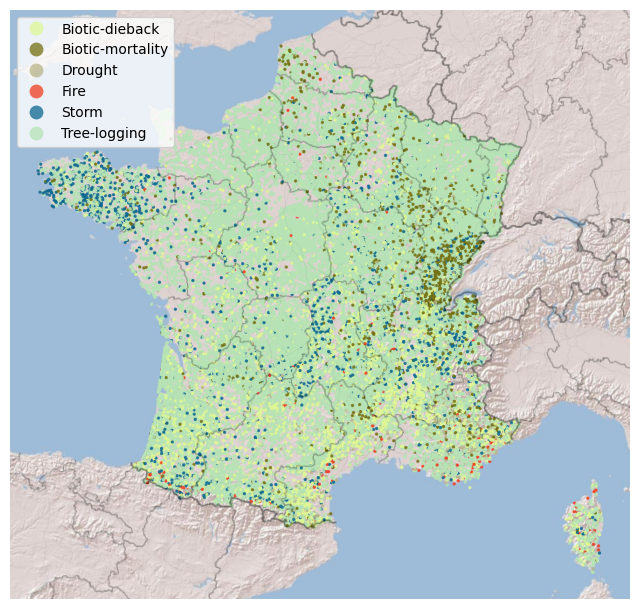

In [11]:
#custom cmap with [yellow, yellowbrown, light brown, red, dark bluegreen, grey]
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

colors = ['#e0f794', '#757012', '#b8b48a', '#f03b20', '#0c6791', '#b6e3b6']
cmap = ListedColormap(colors)


import contextily as cx 
col = ['class', 'probability', 'intensity', 'start_date', 'end_date'] 
gdf.dropna(subset=['class'], inplace=True)
ax = gdf[col+['geometry']].plot(column='class', figsize=(8,8), legend=True, alpha=0.75, markersize=2, cmap=cmap)
ax.set_axis_off()
source = cx.providers.Esri.WorldShadedRelief
cx.add_basemap(ax, crs=gplot.crs, source=source, attribution=False)
#add tonelite map
cx.add_basemap(ax, crs=gplot.crs, zoom=6, source=cx.providers.Stamen.TonerLines, attribution=False, alpha=0.5)


In [142]:
#fig save with dpi=200

ax.get_figure().savefig('../figures/classification_FI.png', dpi=200, bbox_inches='tight')

## Year of observation per cause

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


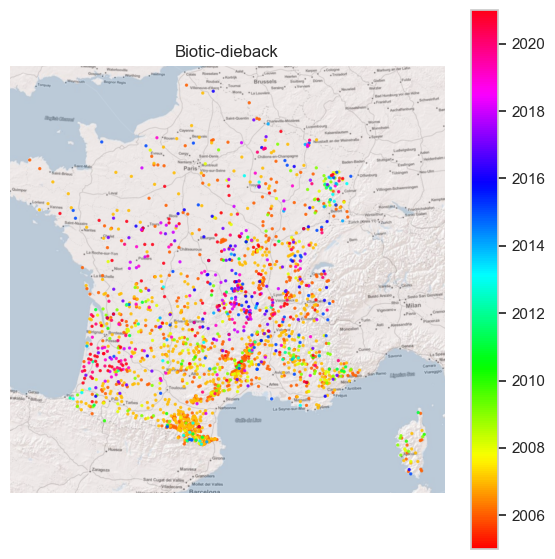

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


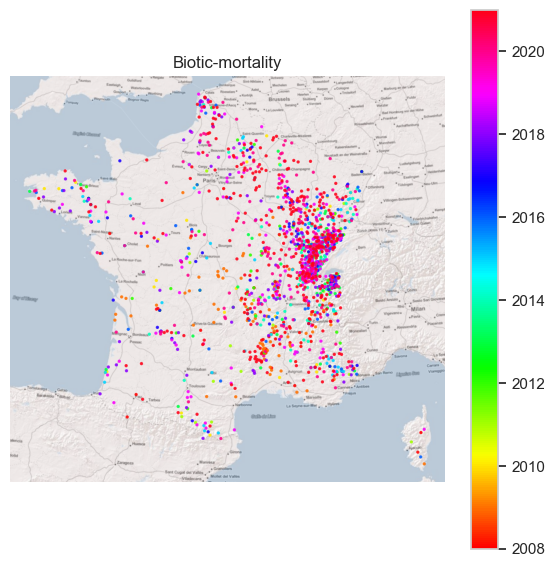

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


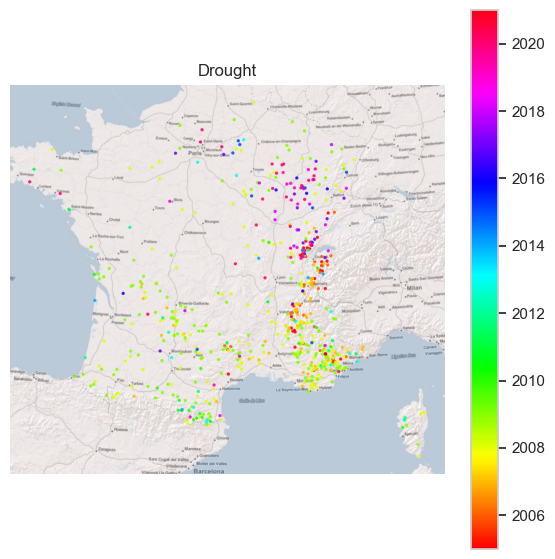

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


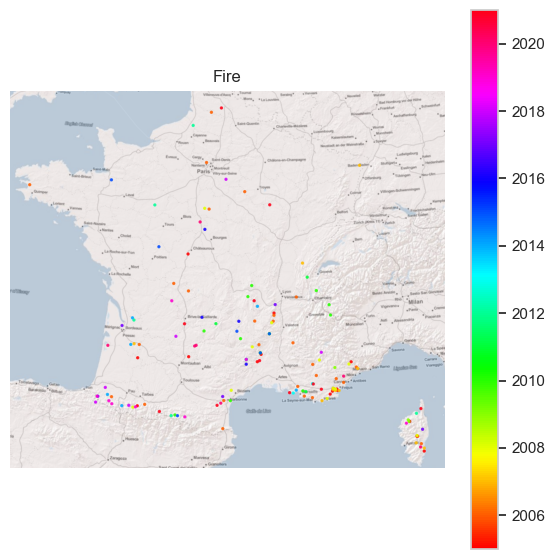

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/geopandas/plotting.py:732: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


KeyboardInterrupt: 

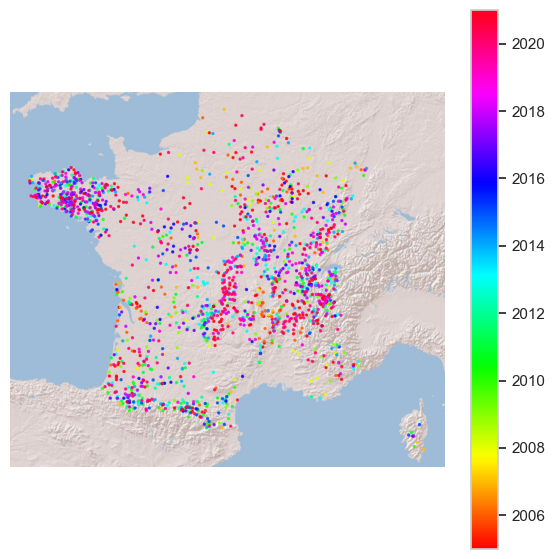

In [23]:
import matplotlib.pyplot as plt

for cause in gplot['class'].unique():

    fig, ax = plt.subplots(figsize=(7,7))
    gplot[gplot['class']==cause].plot(ax=ax, column='CAMPAGNE', legend=True, alpha=0.75, markersize=2, cmap='hsv')
    ax.set_axis_off()
    source = cx.providers.Esri.WorldShadedRelief
    cx.add_basemap(ax, crs=gplot.crs, source=source, attribution=False)
    #add tonelite map
    cx.add_basemap(ax, crs=gplot.crs, source=cx.providers.Stamen.TonerLite, attribution=False, alpha=0.5)
    plt.title(cause)
    plt.show()

## Histograms

/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/arthurcalvi/Venv/DiAtDaJo/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

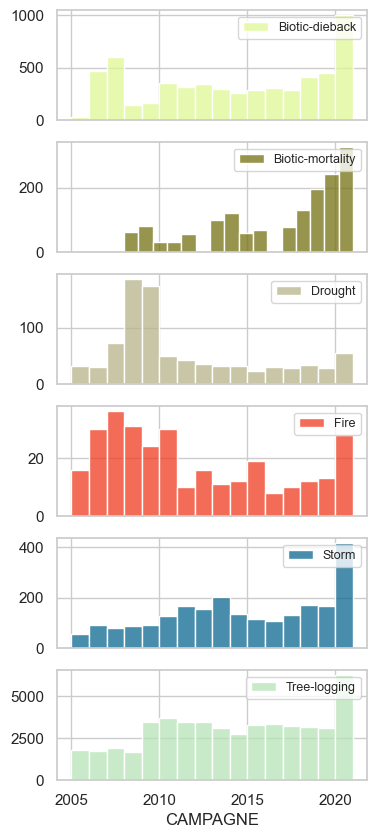

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(6, 1, figsize=(4, 10), sharex=True)

classes = sorted(gdf['class'].unique())
for i,cls in enumerate(classes):
    class_data = gdf[gdf['class'] == cls]
    
    sns.histplot(ax=axes[i], data=class_data, x='CAMPAGNE', bins=16, color=colors[i], label=cls)
    #legend in small
    axes[i].set(ylabel=None)
    axes[i].legend(loc='upper right', fontsize=9)
    



In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(5,12))
gdf[['class', 'probability']].plot.hist(ax=ax, by='class', sharex=True, bins=50)

fig, ax = plt.subplots(1,1, figsize=(4,10))
gdf[['class', 'CAMPAGNE']].plot.hist(ax=ax, by='class', sharex=True, bins=50)

## Writing

In [74]:
gdf[['IDP', 'CAMPAGNE', 'geometry'] + col].to_crs('epsg:4326').to_parquet('../data/NFI_2003-2021_EPSG4326_FR.parquet')
